# Exploring Stochastic Gradient Descent with Pytorch: A Simple Linear Approximation Example


## Introduction

Welcome to this Jupyter notebook exploring the power of Stochasting Gradient Descent, the workhorse of machine learning, and its implementation using Pytorch. 

Our objective of this notebook is to provide a clear and intuitive understanding of how [Stochastic Gradient Descent (SGD)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) works by solving a simple linear approximation problem using gradient descent, and how to code it using [PyTorch](https://pytorch.org), one of the most popular deep learning frameworks.


### A Simplified Version of a Neural Network Architecture

The motivation for creating this notebook is to gain hands-on experience in coding with PyTorch. The simplicity of the linear model will allow us to easily verify and visualize our results, and also allows us to focus on the optimization process and understand the workings of the algorithm better.

In addition to core Pytorch utilities such as `nn.Module` to define our linear model, we will also explore some of the additional modules such as an optimizer to update the model parameters, and a scheduler to reduce the learning rate. We use Pytorch's data classes to wrap the data for training and evaluation and use a generator to control the order of sampling training data. Finally, we will prepare to leverage PyTorch's ability to use [CUDA](https://pytorch.org/docs/stable/notes/cuda.html) GPUs to accelerate the learning process in more compliated machine learning tasks.

While the linear model implemented in this notebook is a relatively simple example, the architecture and code structure used is very similar to what would be used in a real-world machine learning problem. In fact, this implementation can be easily extended to more complex neural network architectures simply by adding additional layers and modifying the loss function and optimizer. Thus, the concepts and techniques presented here are highly relevant to anyone interested in machine learning with PyTorch.

### Visualizing the SGD Algorithm

One of the goals of this notebook is to gain a better understanding of how the stochastic gradient descent (SGD) algorithm works. In this notebook, we will not only implement SGD using Pytorch but also provide visualizations that show how the algorithm converges towards the optimal value. We will show how the error surface changes with each iteration when a new data sample is used to calculate the value of the loss function and, consequently, how the gradient points to current direction of steepest descent.

By visualizing these changes, we hope to gain insight into how the algorithm is able to find the optimal values for the model parameters. The principles we will be exploring can be extended to more complex problems and models.

### Use of ChatGPT for Text Generation

While the code has been manually crafted by the author, the texts in this notebook, including this introduction, have been created with the aid of [ChatGPT](https://openai.com/blog/chatgpt), a large language model trained by [OpenAI](https://openai.com/). By using prompts, ChatGPT generates human-like text based on the input it receives.

The language model generated each piece of text in response to a prompt designed to elicit a specific type of response. For example, a prompt may request a subheading and a description of a code cell. These prompts were created by the author who then organized the generated text into a coherent and meaningful narrative. Also, the LaTeX equations presented in this document were created with the assistance of ChatGPT.

For example, a prompt could be "_Can you provide a brief explanation of the cubehelix_palette colormap in Seaborn?_" and the resulting text chapter would be a concise explanation of the colormap.

Here's another example of a prompt that was used to create a descriptive subheading and text chapter based on the code cell contents.

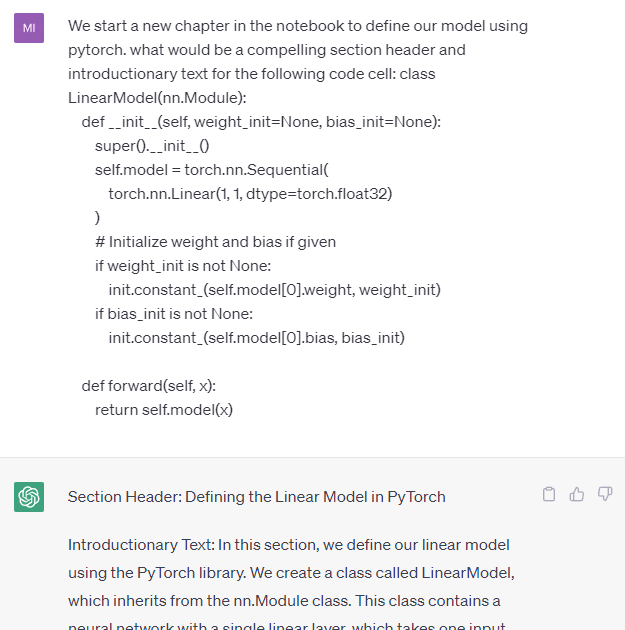

We hope that this notebook will serve as a useful resource for those who are new to PyTorch, as well as those who are looking to improve their understanding of linear regression and gradient descent. So, whether you're new to machine learning or an experienced practitioner, this notebook will provide you with valuable insights into the workings of SGD and its implementation using Pytorch.

Let's get started!

## Introduction to the Approximation Problem and Linear Model

The function we aim to approximate in this notebook is a fourth-degree polynomial:

$$
f(x) = - 0.4 x^4  + 1.8 x^3 - 2 x + 4
$$

In [ ]:
def func(x_data):
    return - 0.4 * x_data ** 4 + 1.8 * x_data ** 3 - 2 * x_data + 4

We will add gaussian $\mathcal{N}(0,1)$ noise to the observations and approximate the polynomial function using a linear model. Specifically, we will try to learn the coefficients of a linear equation of the form:

$$y = wx + b$$

where $w$ is the weight, $b$ is the bias, and $x$ is the input feature.



### Stochastic Gradient Descent algorithm

 We use gradient descent to iteratively adjust the values of $w$ and $b$ in order to minimize the difference between the observed noisy values of the polynomial and the values predicted by the linear model. 
 
 Note that the term "stochastic" refers to the fact that the algorithm selects a random subset of the training data to compute the gradient of the loss function and update the model parameters in each iteration, rather than using the entire dataset.
 
 The use of training batches makes the computation of the gradients and the update of the parameters faster and more computationally efficient, especially for large datasets. However, since the training batch is randomly selected, the gradient estimate is a stochastic approximation of the true gradient, which introduces some noise and randomness into the optimization process.

 In the following, we define the SGD updates for our linear model using [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as loss function. MSE loss is a common loss function for regression problems and measures the average squared difference between the predicted and actual values. 

The mean squared error (MSE) loss function measures the average squared difference between the predicted and true values for all samples in the batch. The mathematical equation for the MSE loss function can be expressed as:

$$ \mathcal{L}_{MSE} = \frac{1}{N}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where $N$ is the number of samples in the batch, $y_i$ is the true value for sample $i$, and $\hat{y}_i$ is the predicted value for sample $i$. 

When $\hat{y}_i$ is estimated by linear model $\hat{y}_i=wx_i+b$, the equation becomes:

$$
\mathcal{L}_{MSE} = \frac{1}{N}\sum_{i=1}^N (y_i - (w x_i + b))^2
$$

The equation for the partial derivative of the MSE loss with respect to the weight parameter $w$, when using linear estimation, can be derived as follows:

$$\frac{\partial \mathcal{L}_{MSE}}{\partial w} = \frac{1}{N} \sum_{i=1}^{N} 2(y_i - (wx_i + b))(-x_i)$$

Rearranging slightly, we get:

$$\frac{\partial \mathcal{L}_{MSE}}{\partial w} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - (wx_i + b))x_i$$

where $N$ is the number of samples in the batch, $x_i$ is the $i$-th feature value, and $y_i$ is the corresponding target value.

Similarly, the equation for the partial derivative with respect to the bias parameter $b$ is given by

$$\frac{\partial \mathcal{L}_{MSE}}{\partial b} = -\frac{2}{N} \sum_{i=1}^{N} (y_i - (wx_i + b))$$

The logic of the SGD algorithm is to update the parameter values at each iteration in the direction of the negative gradient of the loss function with respect to the parameters. This approach enables the algorithm to converge towards the optimal parameter values that minimize the loss function. The _gradient descent update_ for weight $w$ and bias $b$ with learning rate $\alpha$ is given by:

$$w_{i+1} = w_i - \alpha \cdot \frac{\partial \mathcal{L}}{\partial w}\bigg\rvert_{w=w_i}$$

and

$$b_{i+1} = b_i - \alpha \cdot \frac{\partial \mathcal{L}}{\partial b}\bigg\rvert_{w=w_i}$$

where $i$ is the iteration index, and notation $\frac{\partial \mathcal{L}}{\partial w}\bigg\rvert_{w=w_i}$ represents the partial derivative of the loss function with respect to the weight parameter $w$, evaluated at the current weight value $w_i$.

## Library imports

First, we import the necessary libraries for our Pytorch implementation of the SGD algorithm. As discussed, we will use [Pytorch](https://pytorch.org/) to define and train our linear model. We will also use [NumPy](https://numpy.org/) and [Pandas](https://pandas.pydata.org/) for data handling, and [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/) for visualization.

In [ ]:
import torch
import numpy as np
import pandas as pd

from torch.utils.data import DataLoader, Dataset
from torch import nn
import torch.nn.init as init

import matplotlib.pyplot as plt
import seaborn as sns

We confirm the version of Pytorch used as [version 2.0](https://pytorch.org/blog/pytorch-2.0-release/):

In [ ]:
print(torch.__version__)

## Check for GPU support

We check for the availability of a CUDA-enabled GPU and set the device to use it for our Pytorch implementation. Even if the current GPU turns out to be a modest NVIDIA GeForce GTX 960, using a GPU can significantly speed up the computation time and improve the training efficiency in a more realistic setting. We will use the Pytorch [torch.cuda](https://pytorch.org/docs/stable/cuda.html) library to check for the availability of a GPU and set the device to use it.

In [ ]:
torch.cuda.is_available()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
torch.cuda.get_device_name(0) if torch.cuda.is_available() else "NA"

 ### Define colors and styles for visualizations

We have selected to use the [RdYlBu colormap](https://colorbrewer2.org/#type=diverging&scheme=RdYlBu&n=7) colors for our visualizations. This 7-class diverging color palette from the ColorBrewer scheme ranges from red to blue with a yellow color at the center. The palette distributes the colors in a way that emphasizes a midpoint or neutral value, with lighter shades towards the center and darker shades towards the edges of the color spectrum.

Later in the code, we refer to the colors as `colors['red']`, `colors['orange']`, and so on, instead of default color names. We assign the corresponding colors in the palette to these names using the zip() function to combine the color names and palette colors.


In [ ]:
RdYlBu = sns.color_palette("RdYlBu", 7)
sns.palplot(RdYlBu)

colors = dict(zip(['red', 'orange', 'lightorange', 'yellow',
              'lightblue', 'steelblue', 'blue'],
                  RdYlBu))

The flare color palette, instantiated as `sns.color_palette("flare_r", as_cmap=True)`, is a colormap consisting of a range of bright and vibrant colors that shift from yellow to red, with darker shades indicating higher values and lighter shades indicating lower values. The colors in the palette are designed to give the impression of a "flare" or explosion of bright colors, making it ideal for highlighting important information or areas of interest in data visualizations.

In [ ]:
palette = sns.color_palette("flare_r", as_cmap=True)
palette

The cubehelix colormap is a color scheme that was designed to show variations of luminosity and hue in a perceptually uniform way, making it ideal for representing data with continuous variations. It starts from a dark color and gradually lightens as it spirals through a set of hues. As the `as_cmap` parameter is set to True, the output of the function is a matplotlib `colormap` object ([link](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Colormap.html)) that can be used to assign colors to data in visualizations.

In [ ]:
cm = sns.cubehelix_palette(
    start=.5, rot=-.75, dark=0.25, light=1,
    reverse=True, as_cmap=True)
cm

We also define the default axis styles and image size below:

In [ ]:
def set_ax(ax):
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)

    plt.setp(ax.spines.values(), linewidth=1.5)


FIG_W = 16
FIG_H = 9

## Random Seed Initialization

We set the random seed for reproducibility. By setting the same seed every time the code is run, we ensure that the random initialization is consistent, and any differences in the output are due to changes in the training process rather than the initialization. 

We set the random seed for Pytorch using `torch.manual_seed()` and for NumPy using `np.random.seed()`. Later, we use `torch.Generator`to seed the generation of samples from our datasets.

In [ ]:
RANDOM_SEED = 1970
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

## Create the data sets

First, we define constants for our data sets

In [ ]:
TRAINING_SAMPLES = 200
EVALUATION_SAMPLES = 50
DATA_X_MIN = -1
DATA_X_MAX = 3
TRAINING_BATCH_SIZE = 1
EVALUATION_BATCH_SIZE = EVALUATION_SAMPLES

### Custom Dataset Class for Creating Training and Evaluation Data

This code defines a custom PyTorch [torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) subclass `FuncDataset`, which generates training and evaluation data for our linear model using the fourth-degree polynomial with added Gaussian noise.

The `len` method returns the length of the data, and the `getitem` method returns a tuple of x and y_noisy data at the given index. Note that these two methods of the abstract `Dataset` class should be overridden by subclass implementations.

The `init` method initializes the class using the `create_data` method, in turn invoking the `func` method defined earlier to draw from our polynomial model and adding gaussian noise to the samples. The method uses the given minimum and maximum input values, number of samples, and either random or linear spacing for input values. 

Note, that in order to ensure that our data is processed by the appropriate device and to take advantage of any available GPU, we make use of the `Tensor.to()` method in PyTorch ([link](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html#torch.Tensor.to)). This method uses the `device` variable defined earlier (e.g., CPU or GPU), to set the device on which the data should be stored and processed.

When data is on the GPU, it is in a format that is not directly compatible with standard Python libraries such as NumPy and Seaborn. Therefore, we need to move the data from the GPU to the CPU using the `Temsor.to('cpu')` method. The `detach()` function is used to remove the tensor from the computation graph to avoid backpropagation. So, our `as_numpy()` function is used to convert the tensor to a NumPy array for easier visualization and analysis.

In [ ]:
class FuncDataset(Dataset):
    def __init__(self, DATA_X_MIN, DATA_X_MAX, samples):
        self._x, self._y_real, self._y_noisy = self.create_data(
            DATA_X_MIN, DATA_X_MAX, samples)

    def __len__(self):
        return len(self._x)

    def __getitem__(self, index):
        return self._x[index], self._y_noisy[index]

    def create_data(self, DATA_X_MIN, DATA_X_MAX, samples, x_spacing='Random'):

        if x_spacing == 'Random':
            x = torch.FloatTensor(samples, 1).uniform_(
                DATA_X_MIN, DATA_X_MAX).sort(dim=0)[0].to(device)
        else:
            x = torch.linspace(DATA_X_MIN, DATA_X_MAX,
                               samples).unsqueeze(-1).to(device)

        y_real = func(x)
        y_noisy = y_real + torch.randn_like(y_real)

        return x, y_real, y_noisy

    def as_numpy(self):
        return (self._x.squeeze()
                .to('cpu').detach().numpy(),
                self._y_real.squeeze()
                .to('cpu').detach().numpy(),
                self._y_noisy.squeeze()
                .to('cpu').detach().numpy())


### Data Preparation and Dataloader Initialization

Next, we focus on preparing the data for training and validation by defining the necessary datasets and dataloaders. On top of datasets, we use `torch.utils.data.DataLoader` ([link](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)). Data loader allows us to conviniently load the data in batches and suffle the data for each training epoch.

We define a generator `torch.Generator` ([link](https://pytorch.org/docs/stable/generated/torch.Generator.html#torch.Generator)) and set the generator seed using `gen.manual_seed()` and pass it to our training data loader using the generator parameter. This allows us to recreate the same data sampling order used during training, which is stored in the report returned by our training function. By setting the seeds, we later ensure that the visualizations of gradient and error surface are coherent and reflect the same data order as used during training.

In [ ]:
gen = torch.Generator()
gen.manual_seed(RANDOM_SEED)


We use the `FuncDataset` class defined above to generate the training and evaluation datasets. We then use `DataLoader` to create the corresponding training and evaluation dataloaders. Additionally, we specify the batch sizes for each dataloader, and set the shuffle flag to True for the training dataloader to ensure that samples are presented in random order during each epoch.

In [ ]:
training_dataset = FuncDataset(
    DATA_X_MIN, DATA_X_MAX, TRAINING_SAMPLES)
training_loader = DataLoader(
    training_dataset, batch_size=TRAINING_BATCH_SIZE, shuffle=True,
    generator=gen)

evaluation_dataset = FuncDataset(
    DATA_X_MIN, DATA_X_MAX, EVALUATION_SAMPLES)
evaluation_loader = DataLoader(
    evaluation_dataset, batch_size=EVALUATION_BATCH_SIZE, shuffle=False)

x_array, y_real_array, y_noisy_array = training_dataset.as_numpy()
x_eval_array, _, y_eval_noisy_array = evaluation_dataset.as_numpy()

### Data set visualization

At this point, it is good to visualize the training and evaluation datasets we just created. The training dataset is shown in blue, where the solid blue line represents the ground truth polynomial function and the blue dots represent the noisy data points. The evaluation dataset is shown in orange, where the orange dots represent the noisy data points.

The x-axis represents the input data, and the y-axis represents the output data. The graph is generated using the seaborn library, and the `sns.despine()` function is used to remove the top and right spines of the plot.

In [ ]:
fig = plt.figure(figsize=(FIG_W, FIG_H))

sns.lineplot(x=x_array, y=y_real_array,
             color=colors['steelblue'], linewidth=2)
sns.scatterplot(x=x_array, y=y_noisy_array,
                color=colors['blue'])
sns.scatterplot(x=x_eval_array, y=y_eval_noisy_array,
                color=colors['orange'])

ax = fig.gca()

ax.set_xticks(range(-1, 4, 1))
ax.set_yticks(range(0, 17, 1))
sns.despine()
set_ax(ax)

## Solving the linear model using least-squares
Before diving deeper into gradient descent implementation, we solve the linear model using least-squares. This is done to get a reference value to assess covergence and results obtained later. The code below retrieves the training dataset and computes the least-squares solution, applying the `torch.linalg` package ([link](https://pytorch.org/docs/stable/linalg.html)).

In [ ]:
x_lin = training_dataset[:][0]
y_lin = training_dataset[:][1]

ls_solution = torch.linalg.lstsq(
    torch.hstack((x_lin, torch.ones(x_lin.shape[0], 1).to(device))),
    y_lin).solution.to('cpu')

We note the values for weight and bias for later comparison:

In [ ]:
print(f'weight {ls_solution[0].item()}, bias {ls_solution[1].item()}')

We define the start and end points of the least-squares result line. Adding the orange line, representing the result from the least-squares method, to the previous plot, we obtain the figure below.

In [ ]:
x_ls_points = torch.FloatTensor([[ DATA_X_MIN, 1], [DATA_X_MAX, 1]])
y_ls_values = torch.matmul(x_ls_points, ls_solution)

In [ ]:
fig = plt.figure(figsize=(FIG_W, FIG_H))

x_array, y_real_array, y_noisy_array = training_dataset.as_numpy()

x_eval_array, _, y_eval_noisy_array = evaluation_dataset.as_numpy()

sns.scatterplot(x=x_array,
                y=y_noisy_array,
                color=colors['blue'])
sns.lineplot(x=x_array,
             y=y_real_array,
             color=colors['steelblue'], linewidth=2)

sns.lineplot(x=x_ls_points[:, 0].numpy(),
             y=y_ls_values.squeeze().numpy(),
             color=colors['orange'], linewidth=2)

ax = fig.gca()

ax.set_xticks(range(-1, 4, 1))
ax.set_yticks(range(0, 17, 1))
sns.despine()
set_ax(ax)

## Defining the Linear Model in PyTorch

In this section, we finally approach to the core of things as we define our linear model using the PyTorch library.

We create a class called `LinearModel`, which inherits from the `nn.Module` class ([link](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)). This class defines a neural network architecture with a single linear layer, which takes one input feature and produces one output. We also provide the option to initialize the weights and biases of the linear layer, if desired. The `forward` method is defined to perform the forward pass through the network.

PyTorch provides a convenient way to define a neural network sequentially using `torch.nn.Sequential`. This class allows us to stack multiple layers in sequence, with the output of one layer becoming the input of the next. By passing a list of layer objects as an argument to `Sequential`, we can define a neural network with any number of layers, each with their own activation functions, etc. This approach can save time and effort when designing more complex neural network architectures. However, our current linear regression problem only has one layer with a single input to add to `torch.nn.Sequential`.
 
Note that we do not need to add a bias term explicitly to our linear layer. This is because the bias term can be thought of as an additional input that is always set to 1, and PyTorch's implementation of the linear layer automatically includes this bias input.

In [ ]:
class LinearModel(nn.Module):
    def __init__(self, weight_init=None, bias_init=None):
        super().__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Linear(1, 1, dtype=torch.float32)
        )

        # Initialize weight and bias if given
        if weight_init is not None:
            init.constant_(self.model[0].weight, weight_init)
        if bias_init is not None:
            init.constant_(self.model[0].bias, bias_init)

    def forward(self, x):
        return self.model(x)

To better visualize the learning process of the gradient descent algorithm, we will initialize our `LinearModel` with non-optimal values. Specifically, we will set the initial weight to `-7` and the initial bias to `7`. This way, we can see how the model learns from these non-optimal starting points to converge towards the true solution.

In [ ]:
INITIAL_WEIGHT = -7
INITIAL_BIAS = 7

In [ ]:
model = LinearModel(weight_init=INITIAL_WEIGHT,
                    bias_init=INITIAL_BIAS).to(device)

The `named_parameters` method returns an iterator over named parameters of our model, where each parameter is a tuple containing the name of the parameter and its value. In the loop, we print out the name and the value of each parameter.

In [ ]:
for name, param in model.named_parameters():
    print(name, param.data)

## Training the Model

### Defining loss functions, optimizers, and schedulers
To start training our model, we first define the loss function, optimizer, and scheduler with the appropriate learning parameters.

For this implementation, we will be using the Mean Squared Error (MSE) loss function [nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss). Furthermore, we will be using the Stochastic Gradient Descent (SGD) optimizer [optim.SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD). In each iteration of SGD, the model's parameters are updated based on the gradient of the loss function with respect to those parameters.

We define an initial learning rate of `0.05`. Additionally, we define a learning rate scheduler using the [`ExponentialLR`](https://pytorch.org/docs/stable/generated/torch.optim.lr_scheduler.ExponentialLR.html#torch.optim.lr_scheduler.ExponentialLR) class in PyTorch, with a decay factor of `0.997`. This scheduler reduces the learning rate by the decay factor `gamma` at each epoch. 

We will train the model for 5 epochs.

In [ ]:
TRAINING_EPOCHS = 5

In [ ]:
loss_fn = nn.MSELoss(reduction='mean')

In [ ]:
INITIAL_LEARNING_RATE = 0.05
GAMMA = 0.997

optimizer = torch.optim.SGD(model.parameters(),
                            lr=INITIAL_LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer,
                                                   gamma=GAMMA)

### Training Initialization and Execution

After defining the model architecture and the necessary hyperparameters, the next step is to initialize the training process. The `train` function takes in the full monty of inputs, including the model, optimizer, scheduler, random generator, data loaders for training and evaluation, and the number of training epochs. It then executes the training loop for the specified number of epochs.

The function then records the training progress by logging the gradient and loss values at each iteration. The function returns two lists of dictionaries: `grad_report` and `loss_report`. The `grad_report` contains the gradient values for the weights and biases of the model, along with the batch loss and learning rate for each iteration. The `loss_report` contains the training and evaluation loss values for each epoch.

During training, the model learns to minimize the loss function by adjusting its weights and biases through the [optimizer's backpropagation algorithm](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html). The scheduler updates the learning rate at each epoch to ensure that the model converges efficiently.

In [ ]:

def train(model, optimizer, scheduler, gen, loss_fn,
          training_loader, evaluation_loader, epochs):

    grad_report = []
    loss_report = []

    # calculate initial loss

    with torch.no_grad():

        model.eval()
        training_loss = 0

        for x_batch, y_batch in training_loader:
            y_pred = model(x_batch)

            loss = loss_fn(y_pred, y_batch)
            training_loss += loss

        evaluation_loss = 0
        for x_eval_batch, y_eval_batch in evaluation_loader:

            eval_pred = model(x_eval_batch)
            evaluation_loss += loss_fn(eval_pred, y_eval_batch)

        loss_report.append({
            "epoch": -1,
            "training_loss":
                training_loss.item()
                * TRAINING_BATCH_SIZE
                / TRAINING_SAMPLES,
            "evaluation_loss":
                evaluation_loss.item()
                * EVALUATION_BATCH_SIZE
                / EVALUATION_SAMPLES,
        })

    gen.manual_seed(RANDOM_SEED)

    for epoch in range(epochs):

        model.train()
        training_loss = 0

        for batch_idx, (x_batch, y_batch) in enumerate(training_loader):

            optimizer.zero_grad()

            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)

            loss.backward()

            training_loss += loss

            grad_report.append({
                "epoch": epoch,
                "iter":
                    epoch
                    * TRAINING_SAMPLES
                    + batch_idx
                    * x_batch.size()[0],
                "weight": model.model[0].weight.item(),
                "bias": model.model[0].bias.item(),
                "weight_grad": model.model[0].weight.grad.item(),
                "bias_grad": model.model[0].bias.grad.item(),
                "batch_loss": loss.item(),
                "learning_rate": scheduler.get_last_lr()[0]
            })

            optimizer.step()
            scheduler.step()

        with torch.no_grad():
            model.eval()

            evaluation_loss = 0
            for x_eval_batch, y_eval_batch in evaluation_loader:

                eval_pred = model(x_eval_batch)
                evaluation_loss += loss_fn(eval_pred, y_eval_batch)

            loss_report.append({
                "epoch": epoch,
                "training_loss":
                    training_loss.item()
                    * TRAINING_BATCH_SIZE
                    / TRAINING_SAMPLES,
                "evaluation_loss":
                    evaluation_loss.item()
                    * EVALUATION_BATCH_SIZE
                    / EVALUATION_SAMPLES,
            })

        tr_loss = (training_loss.item()
                   * TRAINING_BATCH_SIZE / TRAINING_SAMPLES)
        ev_loss = (evaluation_loss.item()
                   * EVALUATION_BATCH_SIZE / EVALUATION_SAMPLES)

        print(f"Epoch {epoch:>3}, "
              "weight "
              f"{model.model[0].weight.item():.4f}"
              ", bias "
              f"{model.model[0].bias.item():.4f}"
              ", lr "
              f"{scheduler.get_last_lr()[0]:.8f}"
              ", training loss: "
              f"{tr_loss:.4f}"
              ", evaluation loss: "
              f"{ev_loss:.4f}")

    return grad_report, loss_report

## Training the model

After defining the necessary components of our data sets and linear model, and initializing the necessary variables, we are finally ready to begin the training process. 

Using the PyTorch library, we will train our linear model with the defined loss function and optimizer, using the training data, and evaluating the model's performance on the evaluation data. The model will be trained for a specified number of epochs, with the learning rate scheduled to decrease over time using the defined scheduler.

The training process will result in an optimized model, ready for use in predicting new values based on the input features - or in this case, a single input feature $x$, using a call `y_pred = model(x_input)`

In [ ]:
grad_report, loss_report = train(model,
                                 optimizer,
                                 scheduler,
                                 gen,
                                 loss_fn,
                                 training_loader, evaluation_loader,
                                 TRAINING_EPOCHS)

### Visualizing Training and Evaluation Losses

We visualize the decreasing trend of loss over the training epochs. The training and evaluation losses are extracted from the `loss_report`, a python `list` of `dict`s, which is returned by the train function. A line plot is created using the Seaborn library, where the x-axis represents the epoch and the y-axis represents the corresponding loss values. The training loss is plotted in blue, while the evaluation loss is plotted in orange. Note that initial loss before any training is done is shown as epoch -1.

In [ ]:
fig = plt.figure(figsize=(FIG_W, FIG_H))

epoch = [row['epoch'] for row in loss_report]
training_loss = [row['training_loss'] for row in loss_report]
evaluation_loss = [row['evaluation_loss'] for row in loss_report]

sns.lineplot(x=epoch,
             y=training_loss,
             color=colors['blue'], linewidth=2)
sns.lineplot(x=epoch,
             y=evaluation_loss,
             color=colors['orange'], linewidth=2)

ax = fig.gca()

sns.despine()
set_ax(ax)

###  Visualization of Linear Approximation during Training

The following cell creates a plot that visualizes how the linear approximation $y = wx +b$ changes during training from the initial values towards the near optimal value. The plot consists of several elements:

- A scatter plot of the training data points in blue color.
- A line plot of the true underlying function (without noise) in light blue color.
- Multiple lines represent linear approximations at different training stages. Each line corresponds to a distinct epoch, and the line color gradually transition from deep purple to a pale gold following the previously introduced seaborn flare color palette.
- A line plot that represents the final linear approximation at the end of training. This line is in yellow color.
- A line plot of the least squares solution in black color.

 Observe the three outstanding lines corresponding to the initial value of weight and bias (set as -7 and 7, correspondingly) and the two training iterations that follow.

In [ ]:
fig = plt.figure(figsize=(FIG_W, FIG_H))

sns.scatterplot(x=x_array,
                y=y_noisy_array,
                color=colors['blue'])
sns.lineplot(x=x_array,
             y=y_real_array,
             color=colors['lightblue'], linewidth=2)

line_ends = np.array([min(x_array), max(x_array)])

for row in grad_report:
    weight = row['weight']
    bias = row['bias']
    sns.lineplot(x=line_ends,
                 y=weight*line_ends+bias,
                 linewidth=1, alpha=0.2,
                 color=palette(row['iter']/grad_report[-1]['iter']))

final_weight = grad_report[-1]['weight']
final_bias = grad_report[-1]['bias']

sns.lineplot(x=line_ends,
             y=final_weight*line_ends+final_bias,
             color=colors['yellow'], linewidth=2)
sns.lineplot(x=x_ls_points[:, 0].numpy(),
             y=y_ls_values.squeeze().numpy(),
             color='black', linewidth=2)

ax = fig.gca()

ax.set_xticks(range(-1, 4, 1))
ax.set_yticks(range(0, 17, 1))
ax.set_xlim(-1, 3)
ax.set_ylim(0, 16)
sns.despine()
set_ax(ax)

We create a Pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) from the dictionary list containing gradient information collected during training as `grad_report`.

The displayed dataframe shows the weight and bias values calculated during the training process using the gradient descent algorithm. Each row represents the updated weight and bias values, which are obtained by multiplying the corresponding gradients with the learning rate and subtracting them from the previous values. The dataframe provides an easy way to verify the gradient descent update at each iteration. 

As can be seen from this small sample, the values of the gradients vary significantly between iterations, and if not compensated with an appropriate learning rate, the weight and bias parameters would be updated uncontrollably.

Note that 5 epochs with 200 training samples each gives us 1000 data samples used in model updates in total.

In [ ]:
pd_grad_report = pd.DataFrame.from_dict(grad_report)
pd_grad_report

### Visualizing the Error Surface

In the following, we generate a 3D surface plot using the matplotlib library to visualize the error surface as well as the evolution of gradients during training. 

For our simple linear model, MSE error values for points of 2D error surface, defined by weight $w$ and bias $b$, and for a given batch of training data, are given by:

$$
E(w,b) = \frac{1}{N}\sum_{i=1}^{N}(y_i - (wx_i+b))^2
$$
where we calculate the sum over $N$ training batch samples $x_i$ and $y_i$

The `get_error_surface()` function takes the training data batch inputs `x_pred` and outputs `y_real` as its inputs and generates an error surface by computing the mean squared error for all combinations of weight and bias values within the defined range, here [-10, 10]. 

In [ ]:
surf_range = np.linspace(-10, 10, 40)

In [ ]:
def get_error_surface(x_pred, y_real):

    error_list = []

    for w in surf_range:
        for b in surf_range:

            y_fit = w * x_pred + b
            e = 1 / len(x_pred) * sum((y_real - y_fit)**2)
            error_list.append([w, b, e])

    return pd.DataFrame(data=error_list, columns=['w', 'b', 'e'])

Here, we calculate the error surface for the whole training data set, using `x_array` and `y_real_array` as inputs. The `z` variable stores the resulting MSE values in a numpy array. 

Note the use of ground truth values of `y_real_array`, as this error surface is a visualization of the performance of the simple linear model with respect to the true underlying fourth-degree polynomial function, rather than the noisy data used in training.

As a sidenote, we highly recommend the Pandas [pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html) method for creating the data arrays for surface plots, such as [Axes3D.plot_trisurf](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_trisurf.html) and [matplotlib.pyplot.contourf](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) used in this notebook.

In [ ]:
error = get_error_surface(x_array, y_real_array)
z = error.pivot_table(index='w', columns='b', values='e').T.values

The resulting 3D plot shows the error surface for the whole training data set as a trisurface and uses our predefined cubehelix colormap `cm`, to indicate the magnitude of the MSE for each pair of weight and bias. The `azim` parameter adjusts the viewing angle.

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d', azim=-35)
ax.plot_trisurf(error['w'], error['b'], error['e'],
                cmap=cm, linewidth=0.2)

ax.set_xlabel("w", fontsize=14)
ax.set_ylabel("b", fontsize=14)
ax.set_zlabel("MSE", fontsize=14)

ax.set_xticks(range(-10,11,2))
ax.set_yticks(range(-10,11,2))


set_ax(ax)
plt.show()

### Visualization of Gradient Descent Trajectory on Error Surface

The following code visualizes the gradient descent trajectory on the error surface. 

The error surface is represented by a contour plot, with contour lines indicating the levels of the mean squared error. The contour plot is created using the previously calculated values of `z`, which is the mean squared error calculated for different combinations of weight and bias values using all of the training data to evaluate the error.

The code also plots the gradient descent trajectory on the contour plot, showing how the values of weight and bias evolve during training, from one update to another. The trajectory is visualized using a line plot, with the color of the line indicating the iteration: The initial `VIS_STEPS` iterations of weight and bias are represented by orange line and markers, while the rest of the training iterations are shown in light blue. The least-squares solution for weight and bias calculated earlier in this notebook is represented by a red cross.

In [ ]:
CONTOUR_LEVELS = 20
VIS_STEPS = 9

These are the initial weight and bias values we aim to highlight in the plot. Once again, it is worth noting the three initial lines with outstanding weight and bias values, and the large gradient value that follows on the third line, resulting in a marked adjustment of the parameters.

In [ ]:
pd_grad_report[0:VIS_STEPS]

In [ ]:
fig = plt.figure(figsize=(12, 12))

plt.contourf(surf_range, surf_range, z,
             cmap=cm, levels=CONTOUR_LEVELS)  

ax = plt.gca()

sns.lineplot(pd_grad_report,
             x='weight',
             y='bias',
             color=colors['lightblue'], linewidth=2,
             sort=False)
sns.lineplot(pd_grad_report[0:VIS_STEPS],
             x='weight',
             y='bias',
             color=colors['orange'], linewidth=2,
             sort=False)
sns.scatterplot(pd_grad_report[0:VIS_STEPS],
                x='weight',
                y='bias',
                color=colors['orange'], marker='o',
                s=12, zorder=100)
plt.plot(ls_solution[0].item(), ls_solution[1].item(), 'x',
         color=colors['red'], markersize=10, markeredgewidth=4)

ax.set_xticks(range(-10, 11, 2))
ax.set_yticks(range(-10, 11, 2))

ax.set_xlabel("w", fontsize=16)
ax.set_ylabel("b", fontsize=16, rotation=0)

set_ax(ax)
sns.despine()
plt.axis('square')

### Visualizing the Gradient Descent for Early Training Iterations

In the following, we plot the gradient and error surface for the first few training iterations. We illustrate how the form of the error surface and consequently the direction of steepest descent depend on the value of the current training sample or values of the current training batch. 

By examining the changes in the error surface and the direction of the gradient as the training progresses, we hope to gain a better understanding of how the algorithm learns to optimize the model parameters to minimize the loss.

The following function, `plot_first_gradients`, plots the gradient and changing error surface for the `n_steps` training iterations of the gradient descent algorithm. 

In [ ]:
def plot_first_gradients(report, loader, n_steps):

    fig, axes = plt.subplots(3, 3, figsize=(16, 16),
                             sharex=True, sharey=True,
                             subplot_kw={'box_aspect': 1,
                                         'xticks': [-10, -5, 0, 5, 10],
                                         'yticks': [-10, -5, 0, 5, 10]})
    axes = axes.flatten('C')

    i = 0

    for epoch in range(TRAINING_EPOCHS):
        for x_batch, y_batch in loader:

            if i == n_steps:
                return

            x_bn = x_batch.squeeze(-1).to('cpu').detach().numpy()
            y_bn = y_batch.squeeze(-1).to('cpu').detach().numpy()

            n_samples = 1
            error = get_error_surface(x_bn, y_bn)
            z = error.pivot_table(
                index='w', columns='b', values='e').T.values

            ax = axes[i]

            ax.contourf(surf_range, surf_range, z,
                        cmap=cm, levels=CONTOUR_LEVELS)
            sns.scatterplot(report[0:i+1],
                            x='weight',
                            y='bias',
                            color=colors['orange'], marker='o',
                            s=12, zorder=100, ax=ax)
            sns.lineplot(report[0:i+1],
                         x='weight',
                         y='bias',
                         color=colors['orange'], linewidth=2,
                         sort=False, ax=ax)
            sns.lineplot(report[i:i+2],
                         x='weight',
                         y='bias',
                         color=colors['red'], linewidth=2,
                         sort=False, ax=ax)

            point_x = report.iloc[i].weight
            point_y = report.iloc[i].bias

            grad_len = np.linalg.norm(
                report.iloc[i][['weight_grad', 'bias_grad']])
            grad_scale = 3

            grad_x = - report.iloc[i].weight_grad / \
                grad_len * grad_scale
            grad_y = - report.iloc[i].bias_grad / grad_len * grad_scale

            ax.arrow(point_x, point_y, grad_x, grad_y,
                     length_includes_head=True,
                     color=colors['lightblue'],
                     linewidth=2, head_width=0.4, head_length=0.4)

            ax.set_xlim(-10, 10)
            ax.set_ylim(-10, 10)
            sns.despine()

            i += 1

    plt.tight_layout()

The following subplots show the error surface contour map, calculated for each current training batch of size one. Remember, we set `TRAINING_BATCH_SIZE = 1` and consequently, model parameters were updated for each training sample. Note that we again set the manual seed of the Generator to ensure that the training data loader provides batches in the same order as during model training, as recorded in the `grad_report`.

The plots show the evolution of the weight $w$ and bias $b$ over iterations in orange, and the current gradient direction as a light blue arrow. As the length of the arrow is normalized, the red line indicates the magnitude of the gradient.

These successive images reveal that the error surface and consequently the gradient, indicating direction of the steepest descent, changes significantly and unpredictably from one iteration to another, sometimes even pointing to opposite directions. It is worth noting how the error surface is very flat around our initial values for the first two updates, resulting only in small updates, but significantly larger for the third update. This highlights the instability of the optimization process and the sensitivity of the gradient to the training data.

However, despite the instability of the optimization process, it is worth noting that the algorithm is still able to converge towards the optimal solution. This underlines the robustness of the gradient descent algorithm and helps to explain the algorithm's prominent role in machine learning.

In [ ]:
gen.manual_seed(RANDOM_SEED)
plot_first_gradients(pd_grad_report, training_loader, VIS_STEPS)

## Training with Increased Batch Size
We now repeat the previous model training, but with a training batch size of 10 instead of 1. This means that the model will be trained on 10 samples at a time before updating the weight and bias values. We will again visualize the error surface to observe any differences in the training process.

In [ ]:
TRAINING_BATCH_SIZE = 10

gen2 = torch.Generator()
gen2.manual_seed(RANDOM_SEED)

training_loader_batch = DataLoader(training_dataset,
                                   batch_size=TRAINING_BATCH_SIZE,
                                   shuffle=True, generator=gen2)
model2 = LinearModel(weight_init=INITIAL_WEIGHT,
                     bias_init=INITIAL_BIAS).to(device)

optimizer2 = torch.optim.SGD(
    model2.parameters(), lr=INITIAL_LEARNING_RATE)
scheduler2 = torch.optim.lr_scheduler.ExponentialLR(
    optimizer2, gamma=GAMMA)

gen2.manual_seed(RANDOM_SEED)
grad_report_batch, loss_report_batch = train(model2,
                                             optimizer2,
                                             scheduler2,
                                             gen2,
                                             loss_fn,
                                             training_loader_batch,
                                             evaluation_loader,
                                             TRAINING_EPOCHS)

pd_grad_report_batch = pd.DataFrame.from_dict(grad_report_batch)

Let's take a peek at our grad_report dataframe. Note that after initial `VIS_STEPS` iterations, the algorithm has been exposed to `TRAINING_BATCH_SIZE * VIS_STEPS` individual training data samples as indicated by the `iter` column of the dataframe.


In [ ]:
pd_grad_report_batch

### Convergence of Gradient Descent Algorithm

Before we dive into visualizing the error surface, let's take a sidestep to see how the algorithm is converging and check if increasing the batch size has made any difference in performance.

The following code generates a plot to compare the training and evaluation loss over epochs for two different batch sizes: previously used single observation updates with batch size of one and current batch size of 10. The plot shows previous results for single observation updates in light color, blue for training lossa and orange for evaluation loss. The loss report lists are iterated to obtain the loss values for the two different batch sizes.

As the lines mostly overlap, it appears that there is no significant difference in learning performance.

In [ ]:
fig = plt.figure(figsize=(FIG_W, FIG_H))

epoch = [row['epoch'] for row in loss_report]
training_loss = [row['training_loss'] for row in loss_report]
evaluation_loss = [row['evaluation_loss'] for row in loss_report]

epoch_batch = [row['epoch'] for row in loss_report_batch]
training_loss_batch = [row['training_loss']
                       for row in loss_report_batch]
evaluation_loss_batch = [row['evaluation_loss']
                         for row in loss_report_batch]

sns.lineplot(x=epoch, y=training_loss,
             color=colors['lightblue'], linewidth=2)
sns.lineplot(x=epoch, y=evaluation_loss,
             color=colors['lightorange'], linewidth=2)

sns.lineplot(x=epoch_batch, y=training_loss_batch,
             color=colors['blue'], linewidth=2)
sns.lineplot(x=epoch_batch, y=evaluation_loss_batch,
             color=colors['orange'], linewidth=2)

ax = fig.gca()
set_ax(ax)

sns.despine()

### Comparing Results for Single Observation and Batch Training: Evolution of Distance to Least Squares Estimate
We compare resuls for single observation and batch training by plotting the evoluton of the distance between the parameter estimates and the least squares estimate of the model parameters during training. The distance is calculated as the $\mathcal{L}1$ norm or Manhattan distance between the estimated weight and bias values obtained through gradient descent, and the weight and bias estimates obtained through the least squares solution. 

The plot shows how the distance to optimal value decreases as the algorithm iteratively updates the weight and bias parameters during training. On the left, for the batch size of one, and on the right for batch size of ten.

In [ ]:
pd_grad_report['dist'] = (pd_grad_report[['weight',
                                          'bias']]
                          - [ls_solution[0].item(),
                             ls_solution[1].item()]
                          ).abs().sum(axis=1)
pd_grad_report_batch['dist'] = (pd_grad_report_batch[['weight',
                                                      'bias']] 
                                - [ls_solution[0].item(),
                                   ls_solution[1].item()]
                                ).abs().sum(axis=1)

Comparing the distance for the final tenth of iterations, we see a slight difference in mean distance, visible also in plots below.

In [ ]:
limit = 900

final_dist_single = np.mean(
    (pd_grad_report[
        pd_grad_report['iter'] >= limit]['dist']))
final_dist_batch = np.mean(
    (pd_grad_report_batch[
        pd_grad_report_batch['iter'] >= limit]['dist']))

print(f"Single sample:   {final_dist_single:.4f}")
print(f"Batch trainging: {final_dist_batch:.4f}")

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 16),
                         sharex=True, sharey=True,
                         subplot_kw={'box_aspect': 3/4})

ax = axes[0]

sns.lineplot(pd_grad_report,
             x='iter',
             y='dist',
             color=colors['blue'], linewidth=2,
             ax=ax)

ax.set_title('Batch size 1', y=0.9)
set_ax(ax)

ax = axes[1]

sns.lineplot(pd_grad_report_batch,
             x='iter',
             y='dist',
             color=colors['blue'], linewidth=2,
             ax=ax)

ax.set_title('Batch size 10', y=0.9)
set_ax(ax)

sns.despine()

### Batch training gradient direction and error surface fluctuations

Below, we recreate the error surface contour maps for the initial updates using the current training batch size of ten samples, calculated at each iteration. 

The error surface for all of the training set is represented by a contour plot. The trajectory is visualized using a line plot, with the initial `VIS_STEPS` iterations represented by orange line and markers, while the rest of the training iterations are shown in light blue. The least-squares solution is represented by a red cross.

In [ ]:
fig = plt.figure(figsize=(12, 12))

plt.contourf(surf_range, surf_range, z,
             cmap=cm, levels=CONTOUR_LEVELS)

ax = plt.gca()

sns.lineplot(pd_grad_report_batch,
             x='weight',
             y='bias',
             color=colors['lightblue'], linewidth=2,
             sort=False)
sns.lineplot(pd_grad_report_batch[0:VIS_STEPS],
             x='weight',
             y='bias',
             color=colors['orange'], linewidth=2,
             sort=False)
sns.scatterplot(pd_grad_report_batch[0:VIS_STEPS],
                x='weight',
                y='bias',
                color=colors['orange'],
                marker='o', s=12, zorder=100)
plt.plot(ls_solution[0].item(), ls_solution[1].item(), 'x',
         color=colors['red'], markersize=10, markeredgewidth=4)

ax.set_xticks(range(-10, 11, 2))
ax.set_yticks(range(-10, 11, 2))

ax.set_xlabel("w", fontsize=16)
ax.set_ylabel("b", fontsize=16, rotation=0)

set_ax(ax)
sns.despine()
plt.axis('square')

Following subplots show the the error surface calculated for each training batch for the first iterations. Current parameter values, and gradient directon and magnitude are indicated in each subplot as previously.

As explained, in contrast to updating model values based on single data samples, batch training involves updating the model values based on a batch of multiple data samples at once. This approach reduces the fluctuations of the error surface that can arise from using a single sample and provides a more stable estimate of the gradient direction.

In [ ]:
gen2.manual_seed(RANDOM_SEED)
plot_first_gradients(pd_grad_report_batch,
                     training_loader_batch, VIS_STEPS)

## Summary

In this notebook, we have explored the implementation of stochastic gradient descent (SGD) using PyTorch with a simple linear model. Here are some final thoughts on what we have learned.

First, PyTorch is a powerful and flexible tool for building and training machine learning models. Using PyTorch to implement SGD with a simple linear model is an excellent way to learn how to code in PyTorch. Using [torch.autograd](https://pytorch.org/docs/stable/autograd.html) of Pytorch, while not elaborated in more detail here, makes the implementation of gradient-based algorithms, such as stochastic gradient descent, really simple. Autograd allows us to automatically compute the gradients of the loss function with respect to the model parameters. This was effectively achieved in three lines of code in this notebook.

We have also learned how to use datasets and loaders in PyTorch, making the implementation useful for real training data. In addition, the built-in code to leverage a CUDA-enabled graphics processing unit (GPU) can be useful when working with larger problems, allowing us to take advantage of the speed and parallelism offered by GPUs of cloud computing platforms with little modification. 

Overall, the required modifications to use the code for more complex machine learning problems are modest. To apply the code to a more realistic machine learning problem, we would need to extend our linear single-layer neural network architecture to contain multiple hidden layers with nonlinearities. We would also need to adjust the input and output dimensions of the model to match the data. Additionally, we might need to modify the loss function to suit the specific problem we are trying to solve. For example, if we are working on a classification problem, we may want to use cross-entropy loss instead of mean squared error.

Secod, we have gained experience on how to apply Python vizualization libraries, and in particular, how to create visualizations of the error surfaces of SGD. This has proven useful for understanding how the algorithm works and how it navigates the parameter space to find optimal solutions. We have shown how SGD is sensitive to the choice of the training batch size: A too small batch size can lead to a noisy estimate of the gradients, while a large batch size can make the algorithm converge slowly in a realistic problem setting and may even get stuck in a bad local minimum when the error surface is more varied.

Another challenge we have not explored here in detail, is the choice of the learning rate, which determines the step size of the updates. We have seen that even in our simple example, there are large differences in gradient magnitudes. A too large learning rate can lead to oscillations or divergence of the algorithm, while a too small learning rate can result in slow convergence or getting stuck in a local minimum. Therefore, it is important to tune the learning rate carefully to obtain a good trade-off between convergence speed and stability. Future work to investigate and visualize the effect of the learning rate choice can be based on the implementation available in this notebook,

So, while SGD is a powerful and widely used optimization algorithm, it presents some challenges that need to be addressed to obtain good performance. By carefully tuning the learning rate, the mini-batch size, and applying regularization techniques, SGD can be a reliable and effective optimization method for training deep neural networks as well.

This notebook has introduced some of the key concepts and techniques in machine learning. By understanding these concepts, we can build and train more sophisticated models for various problems. We hope this notebook has been useful for learning about the concepts and serves as a helpful starting point for exploring advanced machine learning topics. 

Please note that the while text and equations have been generated with ChatGPT's assistance, the author takes full responsibility for the content and any errors or omissions.